In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [150]:
def group(probabilities):
    arr = [0,0]
    for p in probabilities:
        if p < np.random.uniform(0,1): arr[0] += 1
        else: arr[1] += 1
    return arr

class Trial:
    def __init__(self, participants):
        self.participants = int(participants)
    
    def constant_group(self, p):
        res = group([p for _ in range(self.participants)])
        if sum(res) != self.participants:
            raise ValueError('sum < participants; %s < %s' % (sum(res), self.participants))
        return res
    
    def test_error(self, prob):
        res = self.constant_group(prob)
        percent = res[1]/sum(res)
        return (percent/prob)-1

In [151]:
Trial(100000).test_error(0.1), Trial(100000).test_error(0.9)

(-0.008700000000000041, -0.00029999999999996696)

In [184]:
data = []
for volume in np.linspace(20,1000,10):
    for _ in range(100):
        control = Trial(volume).constant_group(0.1)
        test = Trial(volume).constant_group(0.1)
        obs = np.array([control, test])
        res = chi2_contingency(obs)
        data.append({
            'volume': volume,
            'chi': res[0],
            'p-value': res[1],
        })

In [185]:
df = pd.DataFrame(data)

<AxesSubplot:xlabel='volume', ylabel='chi'>

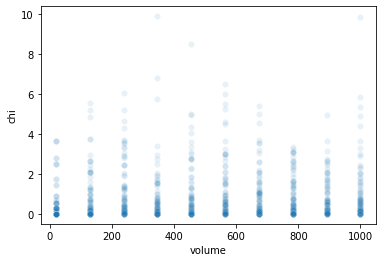

In [187]:
sns.scatterplot(data=df, x='volume', y='chi', alpha=0.1)

In [165]:
sns.lineplot(data=df, x='v', y='p').set(ylim=(0,0.05))

ValueError: Could not interpret value `v` for parameter `x`